In [1]:
ls

Aggregation.txt              overlap.txt4frames.gif
Aggregation.txt12frames.gif  overlap.txt5frames.gif
Aggregation.txt20frames.gif  overlap.txt6frames.gif
Aggregation.txt22frames.gif  overlap.txt7frames.gif
Aggregation.txt3frames.gif   pogo.ipynb
animation-400.mp4            R15.txt
animation-b.mp4              R15.txt22frames.gif
animation-c.mp4              R15.txt40frames.gif
animation-d.mp4              R15.txt50frames.gif
animation.gif                R15.txt60frames.gif
animation.mp4                R15.txt80frames.gif
Compound.txt                 R15.txt93frames.gif
Compound.txt22frames.gif     R15.txt98frames.gif
D31.txt                      README.md
D31.txt19frames.gif          scikitlearn-clustering-data.ipynb
D31.txt22frames.gif          spiral20frames.mp4
D31.txt99frames.gif          spiral40frames.mp4
jain40frames.mp4             spiral.txt
jain.txt                     spiral.txt20frames.gif
jain.txt20frames.gif         spiral.txt5frames.gif
no_structure4frames.gif      sp

In [2]:
import numpy as np
import pandas as pd
import gudhi

In [3]:
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import animation
from matplotlib.collections import PatchCollection

In [4]:

from sklearn import datasets

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import metrics

import os.path

In [5]:
from urllib.request import urlopen
from urllib.parse import urlparse

In [6]:
%matplotlib inline

#randomized blobs with standard deviation
n = 6
std = np.random.random_sample((n,))
#std = 1
X, y, z = make_blobs(
    n_samples=n*100,
    n_features=2,
    centers=n,
    cluster_std=std,
    center_box=(-10.0, 10.0),
    shuffle=False,
    random_state=42,
    return_centers=True,
)



size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [7]:
#data from scikitlearn tutorial on clustering 

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), np.ones(n_samples,dtype='int')

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

In [8]:
X=aniso[0]
y=aniso[1]
filename = 'aniso'


In [9]:

urls_with_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

urls_without_ground_truth = ['https://cs.joensuu.fi/sipu/datasets/D31.txt',
        'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
        'https://cs.joensuu.fi/sipu/datasets/overlap.txt',
        'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
        'https://cs.joensuu.fi/sipu/datasets/a1.txt',
        'https://cs.joensuu.fi/sipu/datasets/R15.txt']

ground_truth_urls = ['https://cs.joensuu.fi/sipu/datasets/overlap.pa'
    
]

urls_with_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_with_ground_truth
}


urls_without_ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in urls_without_ground_truth
}


ground_truth = {
    urlparse(url).path.strip('/').split('/')[-1] : url for url in ground_truth_urls
}

In [10]:
urls_with_ground_truth

{'D31.txt': 'https://cs.joensuu.fi/sipu/datasets/D31.txt',
 'spiral.txt': 'https://cs.joensuu.fi/sipu/datasets/spiral.txt',
 'pathbased.txt': 'https://cs.joensuu.fi/sipu/datasets/pathbased.txt',
 'R15.txt': 'https://cs.joensuu.fi/sipu/datasets/R15.txt'}

In [11]:
ground_truth

{'overlap.pa': 'https://cs.joensuu.fi/sipu/datasets/overlap.pa'}

In [12]:
def return_dataset(filename):
    if filename in urls_with_ground_truth:
        url= urls_with_ground_truth[filename]
        print(url)
        parse = urlparse(url)
        print(filename)
        raw_data = urlopen(url)
        data = np.loadtxt(raw_data)

        print(data.shape)
        print(data[:10])

        y = data[:,2]
        print(y.shape)
        X = data[:,:2]
        print(X.shape)
        return X, y, filename
    else:
        pass

In [13]:
#X, y, filename = return_dataset('spiral.txt')

In [14]:
#iris = datasets.load_iris()
#X = iris.data
#y = iris.target

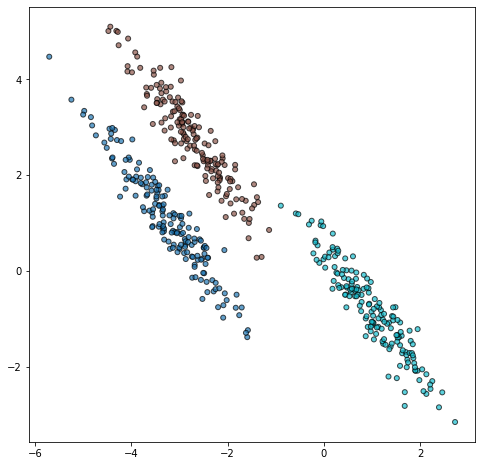

In [15]:
size=8
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=25, 
            c=y,
            marker="o",
            cmap='tab10',
            norm=None,
            alpha=.7,
            edgecolor="k")

In [16]:
rips_complex = gudhi.RipsComplex(points=X)

In [17]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
   
print(simplex_tree.num_vertices() , 'vertices')  
print(simplex_tree.num_simplices(), 'simplices')
print('dimension:', simplex_tree.dimension())

500 vertices
125250 simplices
dimension: 1


usetex mode requires TeX.


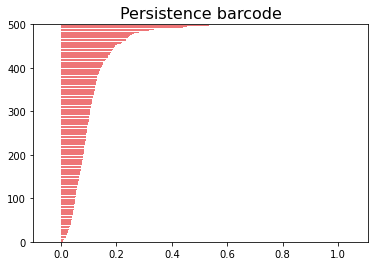

In [18]:
diag = simplex_tree.persistence()
gudhi.plot_persistence_barcode(diag)
plt.show()

In [19]:
#move through list and assign clusters to conected components
point_dict={i:0 for i in range(simplex_tree.num_vertices())}
counter=0
cluster_dict_list = []
distance_list = []
for simplex in simplex_tree.get_filtration():
    if len(simplex[0])>1:
        if all(value > 0 for value in list(point_dict.values())):
            if len(np.unique(np.array(list(point_dict.values())))) == 1:
                print('break')
                print(simplex)
                print(simplex[1])
                simplex_tree.prune_above_filtration(simplex[1])
                break


        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] == 0:
            counter += 1
            point_dict[simplex[0][0]] = counter
            point_dict[simplex[0][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[simplex[0][0]] == 0 and point_dict[simplex[0][1]] != 0:
            point_dict[simplex[0][0]] = point_dict[simplex[0][1]]

            #and vice versa
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] == 0:
            point_dict[simplex[0][1]] = point_dict[simplex[0][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[simplex[0][0]] != 0 and point_dict[simplex[0][1]] != 0 and point_dict[simplex[0][0]] != point_dict[simplex[0][1]]:
            larger_cluster_number = max(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            smaller_cluster_number = min(point_dict[simplex[0][0]], point_dict[simplex[0][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
                    
        distance_list.append(simplex[1])
        cluster_dict_list.append(point_dict.copy())

break
([223, 257], 1.0072537892034616)
1.0072537892034616


In [20]:
max(distance_list)

1.0072116398860067

In [21]:
len(distance_list)

17897

In [22]:
distance_array = np.array(distance_list)
print(len(distance_array))
distance_array.dtype

17897


dtype('float64')

In [23]:
length = len(cluster_dict_list)
length

17897

In [24]:
print(simplex_tree.num_simplices(), 'simplices')
#?

18398 simplices


In [25]:
#check that all clusters have merged
len(np.unique(np.array(list(point_dict.values()))))

1

In [26]:
print(cluster_dict_list[-2].values()) #penultimate clustering has 2 clusters
print(cluster_dict_list[-1].values()) #last clustering finally merges to all one cluster

dict_values([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [27]:
#find the gaps between birth/death pairs
gaps = np.diff(distance_array)
gaps.shape

(17896,)

In [28]:
#add a zero back to the beginning of the gaps
gaps = np.concatenate([np.zeros(1),gaps])

In [29]:
#find normalized distance
scaler = MinMaxScaler()
normed_distance = scaler.fit_transform(distance_array.reshape(-1,1)).T.reshape(length)

In [30]:
#then invert them and multiply by the gaps to weight early connections in the filtration
inverted_normed_distance = 1 - normed_distance
inverted_normed_distance

array([1.00000000e+00, 9.99887541e-01, 9.99161145e-01, ...,
       1.57205884e-04, 1.43308058e-04, 1.11022302e-16])

In [31]:
#and square it to increase the weighting
inverted_normed_distance = np.square(inverted_normed_distance)

In [32]:
inverted_normed_distance

array([1.00000000e+00, 9.99775095e-01, 9.98322993e-01, ...,
       2.47136901e-08, 2.05371994e-08, 1.23259516e-32])

In [33]:
normed_gaps = np.multiply(gaps, inverted_normed_distance)
normed_gaps

array([0.00000000e+00, 1.12505530e-04, 7.25642545e-04, ...,
       1.47540641e-12, 2.85605173e-13, 1.76753909e-36])

In [34]:
#normalize to create a probability vector
gap_vector = normed_gaps / np.sum(normed_gaps)

In [35]:
#check
np.sum(gap_vector)

1.0

In [36]:
gap_vector

array([0.00000000e+00, 3.37411416e-04, 2.17624928e-03, ...,
       4.42483996e-12, 8.56548526e-13, 5.30096490e-36])

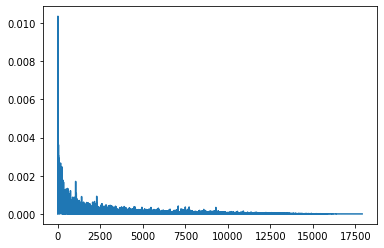

In [37]:
plt.plot(gap_vector)

In [38]:
marker = 0
for i in range(1,length-1):
    if cluster_dict_list[marker] == cluster_dict_list[i]:

        gap_vector[marker] += gap_vector[i]
        gap_vector[i] = 0
        #print(marker)


    else:
        marker = i

1.0000000000000009


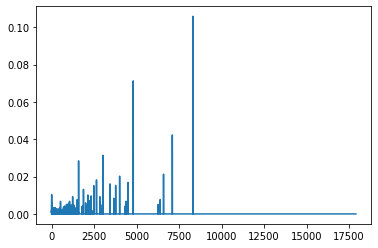

In [39]:
print(np.sum(gap_vector))
plt.plot(gap_vector)

In [40]:
candidates = np.flip(np.argsort(gap_vector))

In [41]:
gap_vector[candidates[0]]

0.10593049228423869

In [42]:
idx = candidates[0]
idx

8321

In [43]:
pred = np.array(list(cluster_dict_list[idx].values()))

In [44]:
print(gap_vector[idx])
print('percent confidence')
'{:.1%}'.format(gap_vector[idx])

0.10593049228423869
percent confidence


'10.6%'

In [45]:
np.array(list(cluster_dict_list[idx].values()))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [46]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

1
your dataset appears to have 1 clusters, not including any outliers


In [47]:
true = y

print(metrics.adjusted_rand_score(true, pred))
print(metrics.silhouette_score(X, pred, metric="sqeuclidean"))

-7.984095681454439e-06
0.33973986361499603


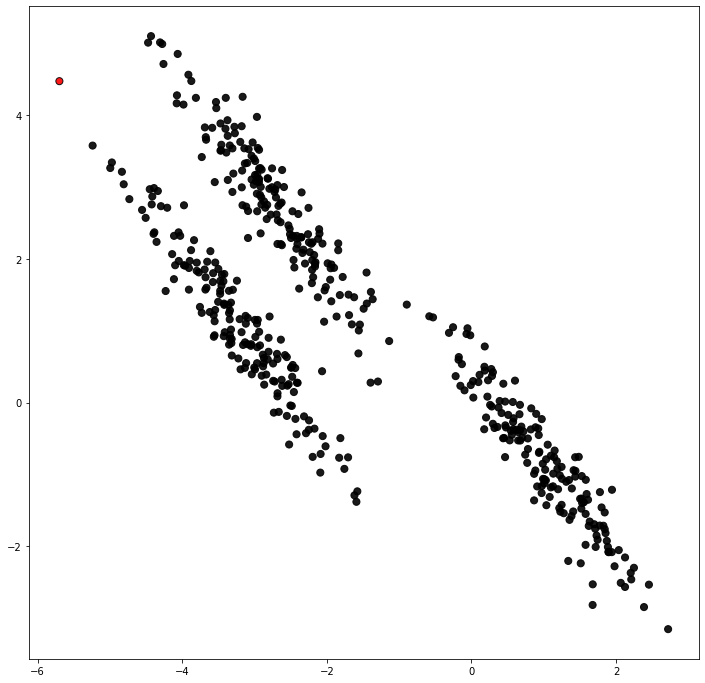

In [48]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=np.array(list(cluster_dict_list[idx].values())),
            marker="o",
            cmap='flag',
            norm=None,
            alpha=.9,
            edgecolor="k")

In [49]:
idx_list = candidates[:100]
idx_list

array([8321, 4803, 7101, 3035, 1590, 6584, 4003, 2643, 4498, 3436, 3770,
       2482, 1877,    8, 2133, 2329, 1241, 2843, 3658, 6391, 1510, 2249,
       4380, 1060,  527,    9, 2006,   18, 1026,  977,  883,    4, 6269,
         10, 2985, 1170, 1319, 2063,  774, 1834, 1800, 4312,  905,  708,
         15,   39, 1114,   21,  821,  144,  481,  200, 1435, 1224, 1089,
        235, 1369,   35,  162,  463,   63,   41,  213, 2960,  113,  196,
        299,  376,  684, 1207,   64,  216,  508,  733,  649,   28,   31,
       1298,  928, 2223,  621,    2, 1132, 1455,   23,  348,  158, 1004,
          6, 1494,   22,   88,  337, 1016,  605,   44,  107,   51,  132,
        565])

In [50]:
idx_list.sort()

In [51]:
idx_list = [x for x in idx_list if x < idx]

In [52]:
idx_array = np.asarray(idx_list)
idx_array

array([   2,    4,    6,    8,    9,   10,   15,   18,   21,   22,   23,
         28,   31,   35,   39,   41,   44,   51,   63,   64,   88,  107,
        113,  132,  144,  158,  162,  196,  200,  213,  216,  235,  299,
        337,  348,  376,  463,  481,  508,  527,  565,  605,  621,  649,
        684,  708,  733,  774,  821,  883,  905,  928,  977, 1004, 1016,
       1026, 1060, 1089, 1114, 1132, 1170, 1207, 1224, 1241, 1298, 1319,
       1369, 1435, 1455, 1494, 1510, 1590, 1800, 1834, 1877, 2006, 2063,
       2133, 2223, 2249, 2329, 2482, 2643, 2843, 2960, 2985, 3035, 3436,
       3658, 3770, 4003, 4312, 4380, 4498, 4803, 6269, 6391, 6584, 7101])

In [53]:
silhouette_list = []
for i in idx_list:
    
    silhouette = metrics.silhouette_score(X, np.array(list(cluster_dict_list[i].values())), metric="euclidean")
    silhouette_list.append(silhouette)

In [54]:
silhouette_array = np.asarray(silhouette_list)

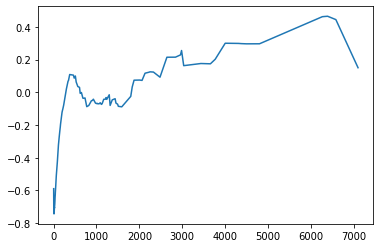

In [55]:
plt.plot(idx_array,silhouette_array)

In [56]:
inverted_normed_distance[idx_array]

array([0.99832299, 0.99456536, 0.99225316, 0.98504096, 0.98094412,
       0.97754197, 0.97272016, 0.96810704, 0.96512316, 0.96376632,
       0.96250437, 0.95940607, 0.95674385, 0.95251475, 0.94867635,
       0.94569196, 0.94289557, 0.93903343, 0.93278705, 0.9310899 ,
       0.92049733, 0.91455981, 0.91149872, 0.90447823, 0.89908475,
       0.8940539 , 0.89182596, 0.87935634, 0.87767223, 0.87061357,
       0.86846881, 0.86247539, 0.84615826, 0.83606605, 0.83357013,
       0.82796431, 0.80904088, 0.80508188, 0.79964328, 0.796082  ,
       0.78981391, 0.7826053 , 0.77878482, 0.77380649, 0.76786826,
       0.76448885, 0.76019679, 0.75326257, 0.74635023, 0.73842201,
       0.73426788, 0.73128953, 0.7250433 , 0.72120523, 0.71945878,
       0.71804742, 0.71307972, 0.70807627, 0.70544509, 0.70260672,
       0.69762458, 0.69295233, 0.6904909 , 0.68783501, 0.68045579,
       0.67818731, 0.67257289, 0.66505707, 0.66233011, 0.65855342,
       0.65657738, 0.64899918, 0.62516265, 0.62175907, 0.61757

In [57]:
inverted_normed_silhouette_array = np.multiply(silhouette_array,inverted_normed_distance[idx_array])

In [58]:
inverted_normed_silhouette_array

array([-0.588074  , -0.6901354 , -0.69255228, -0.70523076, -0.69613171,
       -0.72645427, -0.70878926, -0.69104506, -0.6794545 , -0.68040215,
       -0.6735747 , -0.65511763, -0.637719  , -0.61115924, -0.59434212,
       -0.5801433 , -0.56685709, -0.53408854, -0.47725704, -0.47241391,
       -0.39109422, -0.31806951, -0.29428243, -0.24489143, -0.21627217,
       -0.18538523, -0.17454236, -0.11019736, -0.10463529, -0.09132895,
       -0.08846659, -0.06829088,  0.01728422,  0.05623505,  0.06006039,
        0.08966003,  0.08444431,  0.06955078,  0.0792532 ,  0.04994794,
        0.02770547,  0.02325104, -0.00540331, -0.00127243, -0.02789469,
       -0.02799787, -0.02651169, -0.06635701, -0.06032617, -0.03808257,
       -0.03698971, -0.03101104, -0.04810176, -0.05000603, -0.04875827,
       -0.0501597 , -0.0504522 , -0.04551396, -0.0522927 , -0.0494527 ,
       -0.02998751, -0.02956831, -0.02243087, -0.02980055, -0.01047965,
       -0.05455436, -0.03125358, -0.0262547 , -0.04392734, -0.04

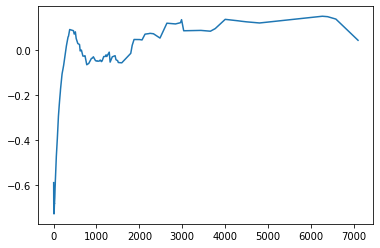

In [59]:
plt.plot(idx_array,inverted_normed_silhouette_array)

In [60]:
max_idx = silhouette_array.argmax()

In [61]:
idx = idx_array[max_idx]
idx

6391

In [62]:
#idx = silhouette_scores.index(max(silhouette_scores[simplex_tree.num_vertices():idx]))
#print(idx)

In [63]:
rand_score_list = []
true = y
for i in idx_list:
    pred = np.array(list(cluster_dict_list[i].values()))
    rand_score = metrics.adjusted_rand_score( true, pred)
    rand_score_list.append(rand_score)

In [64]:
rand_score_array = np.asarray(rand_score_list)

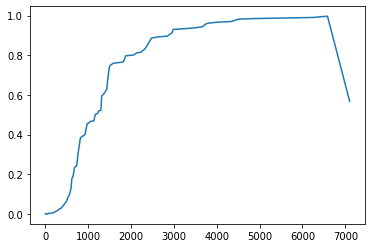

In [65]:
 plt.plot(idx_array,rand_score_array)

In [66]:
max(rand_score_array)

0.9969969609244556

In [67]:
best_idx = idx_array[rand_score_array.argmax()]
best_idx

6584

In [68]:
def get_first_max(array):
    for i in range(len(array)):
        if idx_array[i] > 2*simplex_tree.num_vertices():

            if array[i] > array[i+1]:
                return float(array[i])

In [69]:
first_max = get_first_max(silhouette_array)
idx_array[np.where(silhouette_array == first_max)]

array([1016])

In [70]:
#idx = int(idx_array[np.where(silhouette_array == first_max)])
#idx

In [71]:
pred = np.array(list(cluster_dict_list[idx].values()))
pred

array([1, 1, 2, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 1, 1, 2, 1, 2,
       3, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 1, 3,
       3, 0, 3, 1, 1, 1, 1, 2, 3, 2, 1, 3, 1, 1, 3, 1, 3, 1, 1, 2, 2, 3,
       1, 1, 2, 2, 2, 3, 1, 3, 1, 2, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1,
       1, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 1, 1, 1, 3, 1, 2, 2, 2,
       2, 1, 1, 1, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2, 1, 1, 2, 3, 2,
       1, 2, 1, 3, 3, 1, 3, 1, 2, 1, 3, 2, 2, 2, 1, 3, 3, 2, 1, 2, 3, 3,
       1, 3, 3, 3, 1, 1, 2, 3, 2, 3, 1, 1, 3, 2, 1, 3, 2, 1, 2, 1, 1, 3,
       3, 3, 1, 2, 3, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3,
       2, 2, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 3, 2, 2, 1, 1, 3, 3, 3, 3, 2,
       2, 2, 3, 1, 2, 2, 3, 2, 1, 2, 1, 3, 3, 3, 3, 1, 1, 3, 3, 2, 2, 1,
       2, 3, 1, 3, 1, 1, 1, 2, 2, 3, 2, 1, 3, 3, 2, 1, 3, 3, 2, 1, 3, 1,
       2, 1, 1, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 0, 1, 2, 1,
       2, 3, 3, 2, 2, 3, 1, 1, 3, 3, 2, 1, 3, 3, 3,

In [72]:
rand_score = metrics.adjusted_rand_score( true, pred)
rand_score

0.993987928629904

In [73]:
masked = np.ma.masked_where(pred == 0,pred)
masked

masked_array(data=[1, 1, 2, 1, 3, 2, 1, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 1,
                   1, 2, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 1, 1, 2, 2, 3,
                   2, 2, 2, 3, 2, 2, 1, 3, 3, --, 3, 1, 1, 1, 1, 2, 3, 2,
                   1, 3, 1, 1, 3, 1, 3, 1, 1, 2, 2, 3, 1, 1, 2, 2, 2, 3,
                   1, 3, 1, 2, 1, 1, 2, 1, 3, 2, 1, 2, 1, 1, 1, 1, 1, 2,
                   3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 1, 1, 1, 3, 1, 2,
                   2, 2, 2, 1, 1, 1, 2, 3, 1, 2, 3, 3, 3, 2, 2, 2, 3, 3,
                   2, 1, 1, 2, 3, 2, 1, 2, 1, 3, 3, 1, 3, 1, 2, 1, 3, 2,
                   2, 2, 1, 3, 3, 2, 1, 2, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3,
                   2, 3, 1, 1, 3, 2, 1, 3, 2, 1, 2, 1, 1, 3, 3, 3, 1, 2,
                   3, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 3, 2, 3, 3,
                   2, 2, 3, 3, 3, 3, 1, 3, 3, 1, 2, 2, 3, 2, 2, 1, 1, 3,
                   3, 3, 3, 2, 2, 2, 3, 1, 2, 2, 3, 2, 1, 2, 1, 3, 3, 3,
                   3, 1, 1, 3, 3, 2, 2, 1, 2, 3, 1

In [74]:
#cluster_idx_array = (np.unique(np.array(list(cluster_dict_list[idx].values()))))
#print(cluster_idx_array)
#print(np.count_nonzero(cluster_idx_array))

number_of_clusters = np.count_nonzero(np.unique(np.array(list(cluster_dict_list[idx].values()))))
print(number_of_clusters)
print('your dataset appears to have', number_of_clusters,'clusters, not including any outliers')
#return counts from np.unique? to filter out small clusters?

3
your dataset appears to have 3 clusters, not including any outliers


In [75]:
cmap = plt.cm.get_cmap("flag").copy()
cmap.set_bad(cmap(0))
cmap.set_under(cmap(1))

In [76]:
cmap.get_bad()

array([1., 0., 0., 1.])

In [77]:
#cmap(number_of_clusters)

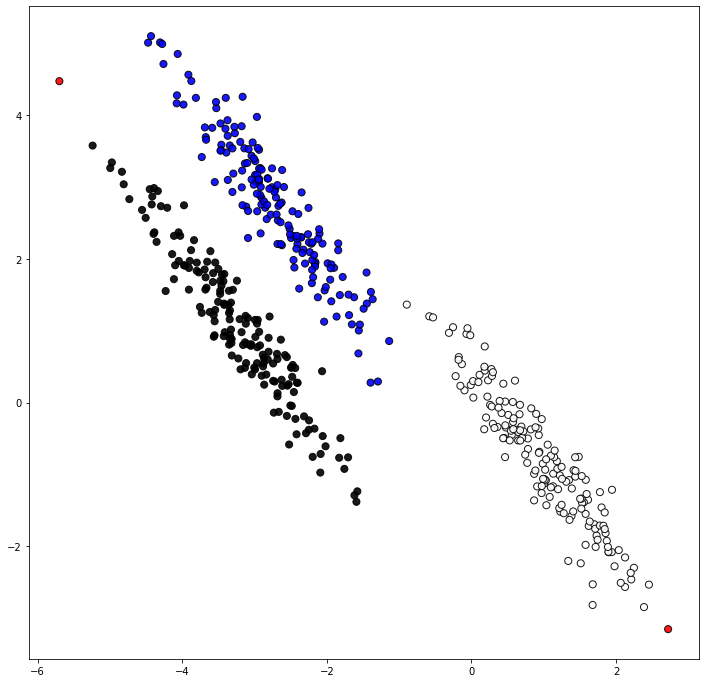

In [78]:
size=12
plt.figure(figsize=(size,size))
plt.scatter(X[:, 0], X[:, 1],
            s=50, 
            c=pred,
            marker="o",
            cmap=cmap,
            norm=None,
            alpha=.9,
            edgecolor="k")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(2,2))
frames = len(idx_array)


outfile = str(filename) + str(frames) + 'frames.gif'

if not os.path.isfile(outfile):
    def init():
        scatter = ax.scatter(X[:, 0], X[:, 1],
                        s=40, 
                        c=np.array(list(cluster_dict_list[0].values())),
                        marker="o",
                        cmap=cmap,
                        norm=None,
                        alpha=1,
                        edgecolor="k")
        #ax.set(xlim=(-1, 35), ylim=(-1, 35))

        return scatter,

    #collection = PatchCollection(X, animated=True)

    #ax.add_collection(collection)
    #ax.autoscale_view(True)

    def animate(i):

        scatter = ax.scatter(X[:, 0], X[:, 1],
                    s=40, 
                    c=np.array(list(cluster_dict_list[idx_array[i]].values())),
                    marker="o",
                    cmap=cmap,
                    norm=None,
                    alpha=1,
                    edgecolor="k")
        return scatter,



    ani = FuncAnimation(fig, animate,interval=100,init_func=init,frames=frames,repeat=False, blit=True)

    #ani.save('animation.gif')



    #writer=animation.PillowWriter()

    #writer = animation.FFMpegWriter(fps=2,bitrate=1000)

    ani.save(outfile)
    fig.show()


def pogo(dataset):
    rips_complex = gudhi.RipsComplex(points=dataset,max_edge_length=100)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)
    df = pd.DataFrame(simplex_tree.get_filtration(), columns=['simplex','distance'])
    #move through list and assign clusters to conected components

    point_dict={i:0 for i in range(simplex_tree.num_vertices())}
    counter=0

    cluster_dict_list = []
    for i in range(simplex_tree.num_vertices(),len(df)):
        #if both points are still in cluster 0, assign both to a new cluster
        if point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            counter += 1
            point_dict[df.loc[i,'simplex'][0]] = counter
            point_dict[df.loc[i,'simplex'][1]] = counter
            #if one point is in cluster 0 and one is not, assign the one in cluster 0 to the existing cluster
        elif point_dict[df.loc[i,'simplex'][0]] == 0 and point_dict[df.loc[i,'simplex'][1]] != 0:
            point_dict[df.loc[i,'simplex'][0]] = point_dict[df.loc[i,'simplex'][1]]

            #and vice versa
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] == 0:
            point_dict[df.loc[i,'simplex'][1]] = point_dict[df.loc[i,'simplex'][0]]

            #if both points are not in cluster 0 and not in the same cluster, merge clusters to the lower number cluster
        elif point_dict[df.loc[i,'simplex'][0]] != 0 and point_dict[df.loc[i,'simplex'][1]] != 0 and point_dict[df.loc[i,'simplex'][0]] != point_dict[df.loc[i,'simplex'][1]]:
            larger_cluster_number = max(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            smaller_cluster_number = min(point_dict[df.loc[i,'simplex'][0]], point_dict[df.loc[i,'simplex'][1]])
            for key, value in point_dict.items():
                if value == larger_cluster_number:
                    point_dict[key] = smaller_cluster_number
        cluster_dict_list.append(point_dict.copy())
        #print(point_dict)
        #print('step',i)

    
    cutoff_value = 0
    for i in range(len(cluster_dict_list)):
        if cutoff_value == 0:
            if all(value != 0 for value in cluster_dict_list[i].values()):
                cutoff_value = i
                print('dataset becomes connected at simplex #',cutoff_value)
       
    df = df[:cutoff_value]
    #cluster_dict_list =
    
    #find the gaps between birth/death pairs

    df['gaps'] = df['distance'] - df['distance'].shift(1)
    
    #find normalized distance
    scaler = MinMaxScaler()
    df['normed_distance'] = scaler.fit_transform(df['distance'].values.reshape(-1, 1))

    #Mulitply the gaps by their normed location in the filtration, weighting features more heavily if they're later
    df['normed_gaps'] = df['gaps'] * df['normed_distance']

    norm_sum = df['normed_gaps'].sum()
    df['probability_vector_normed_gaps'] = df['normed_gaps'] / norm_sum
    
    gap_sum = df['gaps'].sum()
    df['probability_vector_gaps'] = df['normed_gaps'] / gap_sum

    partition = 10
    candidates = [i for i in df.nlargest(partition ,['gaps']).index if i in df.nlargest( partition,['normed_gaps']).index]
    #print('possible cuttoffs' , candidates)
    idx = cutoff_value - 1
    #idx = candidates[0]
    print('idx' ,idx)

    print('your dataset appears to have', len(np.unique(np.array(list(cluster_dict_list[idx].values())))),'clusters')

    #print( np.array(list(cluster_dict_list[idx].values())))

    print(simplex_tree.num_vertices() , 'vertices')  
    print(simplex_tree.num_simplices(), 'simplices')
    print('dimension:', simplex_tree.dimension())

    size=10
    plt.figure(figsize=(size,size))
    plt.scatter(dataset[:, 0], dataset[:, 1],
                s=30, 
                c=np.array(list(cluster_dict_list[idx].values())),
                marker="o",
                cmap='rainbow',
                norm=None,
                alpha=.9,
                edgecolor="k")
    
    return cluster_dict_list, candidates, idx


cluster_dict_list, candidates, idx = pogo(X)

true = y
pred = np.array(list(cluster_dict_list[idx].values()))

print('adjusted rand score =' , metrics.adjusted_rand_score(true, pred))
